### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from collections import Counter
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns

### Display Full rows

In [4]:
pd.set_option("display.max_rows", 200)

### Load Dataset

In [6]:
dataset=pd.read_csv("groceries - groceries.csv")

In [7]:
market = []
for i in range(dataset.shape[0]):
    customer = [item for item in dataset.iloc[i] if isinstance(item, str)]
    market.append(customer)

### Count frequency of each item

In [9]:
all_items = [item for transaction in market for item in transaction]
item_counts = Counter(all_items)


### Convert to DataFrame and sort

In [11]:
item_freq_df = pd.DataFrame({
    "Item Name": item_counts.keys(),
    "Frequency": item_counts.values()
}).sort_values(by="Frequency", ascending=False)


### Display top items

In [13]:
print(item_freq_df.head())

           Item Name  Frequency
7         whole milk       2513
11  other vegetables       1903
17        rolls/buns       1809
31              soda       1715
5             yogurt       1372


###  Encode transactions

In [15]:
te = TransactionEncoder()
te_ary = te.fit_transform(market)
df = pd.DataFrame(te_ary, columns=te.columns_)

### Apply Apriori algorithm

In [17]:
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True, max_len=3)
frequent_itemsets = frequent_itemsets.sort_values(by="support", ascending=False)

In [18]:
print(frequent_itemsets.head())

     support            itemsets
26  0.255516        (whole milk)
15  0.193493  (other vegetables)
19  0.183935        (rolls/buns)
23  0.174377              (soda)
27  0.139502            (yogurt)


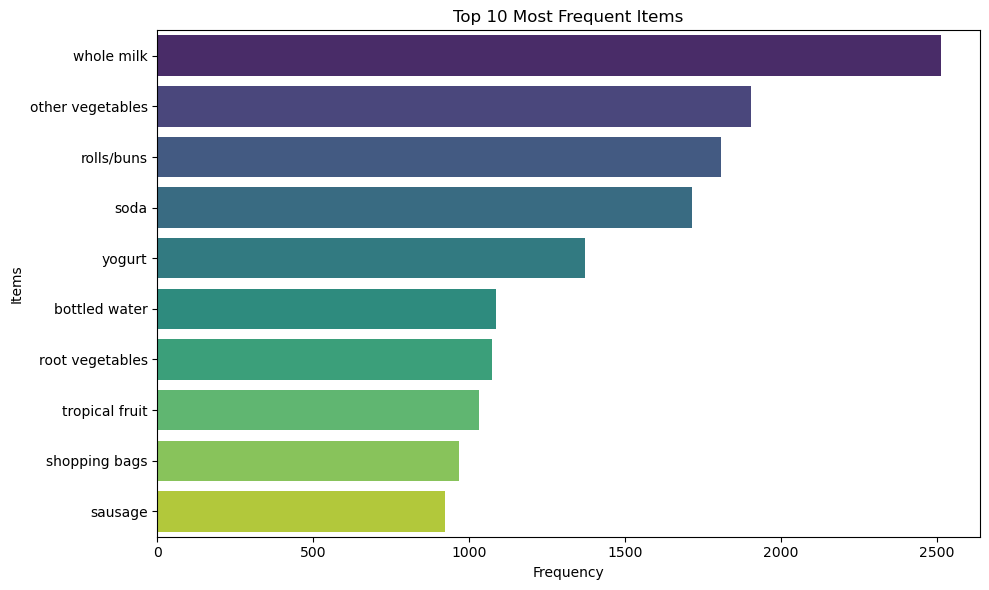

In [19]:
top_items = item_freq_df.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x="Frequency", y="Item Name", hue="Item Name",data=top_items, palette="viridis")
plt.title("Top 10 Most Frequent Items")
plt.xlabel("Frequency")
plt.ylabel("Items")
plt.tight_layout()
plt.show()

### Generate association rules

In [21]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules = rules.sort_values(by="lift", ascending=False)

### Display top rules

In [23]:
print(rules[["antecedents", "consequents", "support", "confidence", "lift"]].head())

          antecedents         consequents   support  confidence      lift
4            (yogurt)        (whole milk)  0.056024    0.401603  1.571735
5        (whole milk)            (yogurt)  0.056024    0.219260  1.571735
0  (other vegetables)        (whole milk)  0.074835    0.386758  1.513634
1        (whole milk)  (other vegetables)  0.074835    0.292877  1.513634
2        (rolls/buns)        (whole milk)  0.056634    0.307905  1.205032
